In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sps = pd.read_excel("/Users/aleksandradenisova/Laboratory/data/ALLBIRDTRAITS_Database_August_2024_VGL_SPECIES.xlsx")
sps = sps[[
    'Scientific Name', 'Total Innovation rate 2022', 'Technical Innovation 2020',
    'Food Type Innovation 2020', 'Relative brain size',
    'Absolute brain size', 'Body mass (log)'
]]
sps.head()

,Scientific Name,Total Innovation rate 2022,Technical Innovation 2020,Food Type Innovation 2020,Relative brain size,Absolute brain size,Body mass (log)
0,Taeniopygia guttata,-0.362610,-0.549,0.028,-0.254,0.447,12.04
1,Lonchura striata domestica,0.290912,NaN,NaN,0.254,0.752,12.30
2,Haemorhous mexicanus,0.153182,0.206,0.102,-0.012,0.786,21.40
3,Fringilla coelebs,1.381073,0.572,1.663,-0.032,0.818,23.81
4,Melospiza georgiana,-0.630211,-0.309,-0.380,0.192,0.822,16.10


In [31]:
age_df = pd.read_csv("anage_data.txt", sep = "\t")
age_df["Scientific Name"] = age_df.apply(lambda x: f'{x.Genus} {x.Species}', axis=1)
age_df.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References,Scientific Name
0,3,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Escarpia,laminata,Escarpia laminata,NaN,...,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1466,Escarpia laminata
1,5,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Lamellibrachia,luymesi,Lamellibrachia luymesi,NaN,...,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,652,Lamellibrachia luymesi
2,6,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Seepiophila,jonesi,Seepiophila jonesi,NaN,...,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,1467,Seepiophila jonesi
3,8,Animalia,Arthropoda,Arachnida,Araneae,Theridiidae,Latrodectus,hasselti,Australian redback spider,NaN,...,unknown,medium,low,NaN,NaN,NaN,NaN,NaN,1455,Latrodectus hasselti
4,9,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296",Daphnia pulicaria


In [51]:
sps_age_merged = sps.merge(age_df, how = "inner")

assert sps_age_merged["Class"].unique().item() == "Aves"

Удалена колонка 'Gestation/Incubation (days)' - 48.7% пропущенных значений
Удалена колонка 'Weaning (days)' - 100.0% пропущенных значений
Удалена колонка 'Litter/Clutch size' - 50.0% пропущенных значений
Удалена колонка 'Litters/Clutches per year' - 59.0% пропущенных значений
Удалена колонка 'Inter-litter/Interbirth interval' - 100.0% пропущенных значений
Удалена колонка 'Birth weight (g)' - 61.5% пропущенных значений
Удалена колонка 'Weaning weight (g)' - 100.0% пропущенных значений
Удалена колонка 'Growth rate (1/days)' - 51.3% пропущенных значений
Удалена колонка 'IMR (per yr)' - 92.3% пропущенных значений
Удалена колонка 'MRDT (yrs)' - 96.2% пропущенных значений
Удалена колонка 'Metabolic rate (W)' - 75.6% пропущенных значений
Удалена колонка 'Body mass (g)' - 75.6% пропущенных значений
Удалена колонка 'Temperature (K)' - 98.7% пропущенных значений

Колонки долей NA <= 0.4 : ['Total Innovation rate 2022', 'Technical Innovation 2020', 'Food Type Innovation 2020', 'Relative brain siz

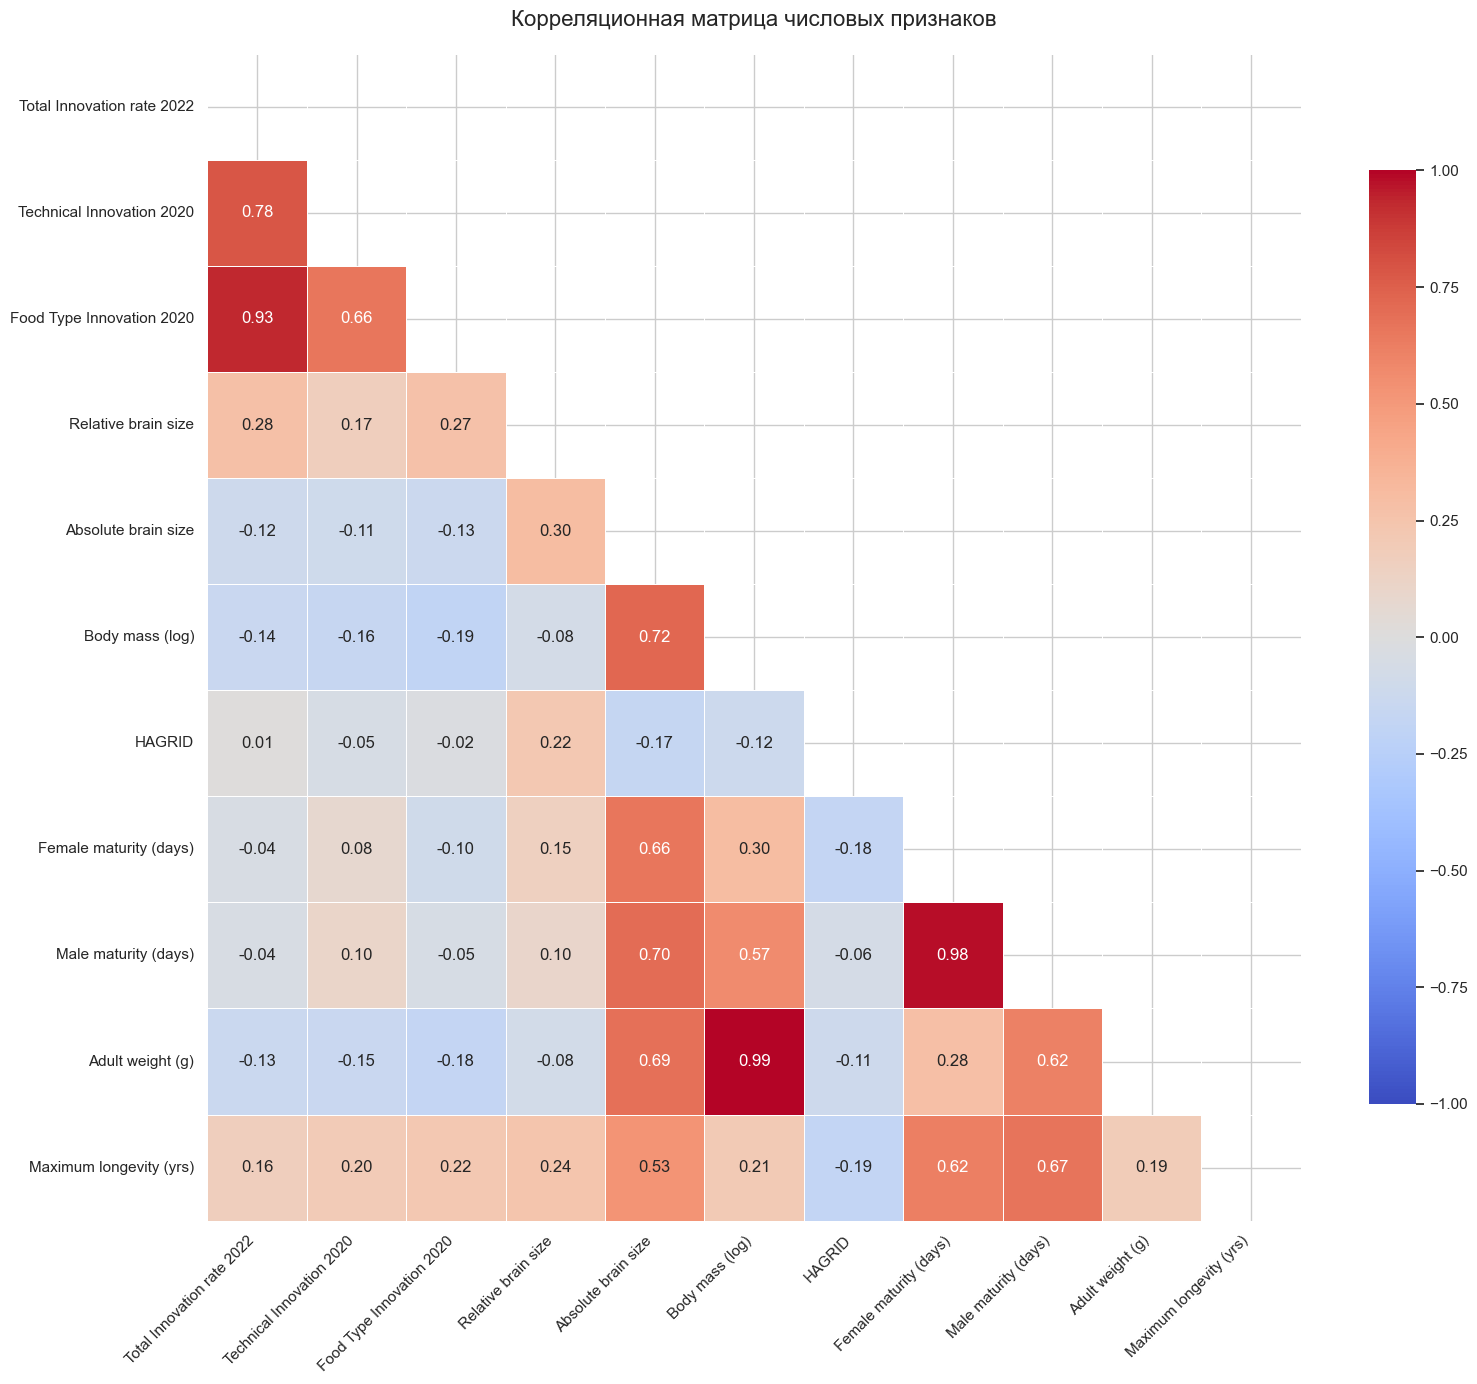

In [90]:
MAX_NA_RATIO = 0.4  # Максимально допустимая доля пропущенных значений в колонке (30%)

numeric_cols = sps_age_merged.select_dtypes(include=[np.number]).columns.tolist()

clean_cols = []
for col in numeric_cols:
    na_ratio = sps_age_merged[col].isna().mean()
    if na_ratio <= MAX_NA_RATIO:
        clean_cols.append(col)
    else:
        print(f"Удалена колонка '{col}' - {na_ratio:.1%} пропущенных значений")

print(f"\nКолонки долей NA <= {MAX_NA_RATIO} : {clean_cols}")

corr_matrix = sps_age_merged[clean_cols].corr()

def plot_correletion(corr_matrix):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(16, 14))

    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                center=0,
                vmin=-1, 
                vmax=1,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8})

    plt.title('Корреляционная матрица числовых признаков', pad=20, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

plot_correletion(corr_matrix)

Анализируем 11 числовых колонок: ['Total Innovation rate 2022', 'Technical Innovation 2020', 'Food Type Innovation 2020', 'Relative brain size', 'Absolute brain size', 'Body mass (log)', 'HAGRID', 'Female maturity (days)', 'Male maturity (days)', 'Adult weight (g)', 'Maximum longevity (yrs)']


/var/folders/fc/n8rj9g1j6_x12_dl3p0fqv7c0000gn/T/ipykernel_16279/2060214477.py:54: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(corr)


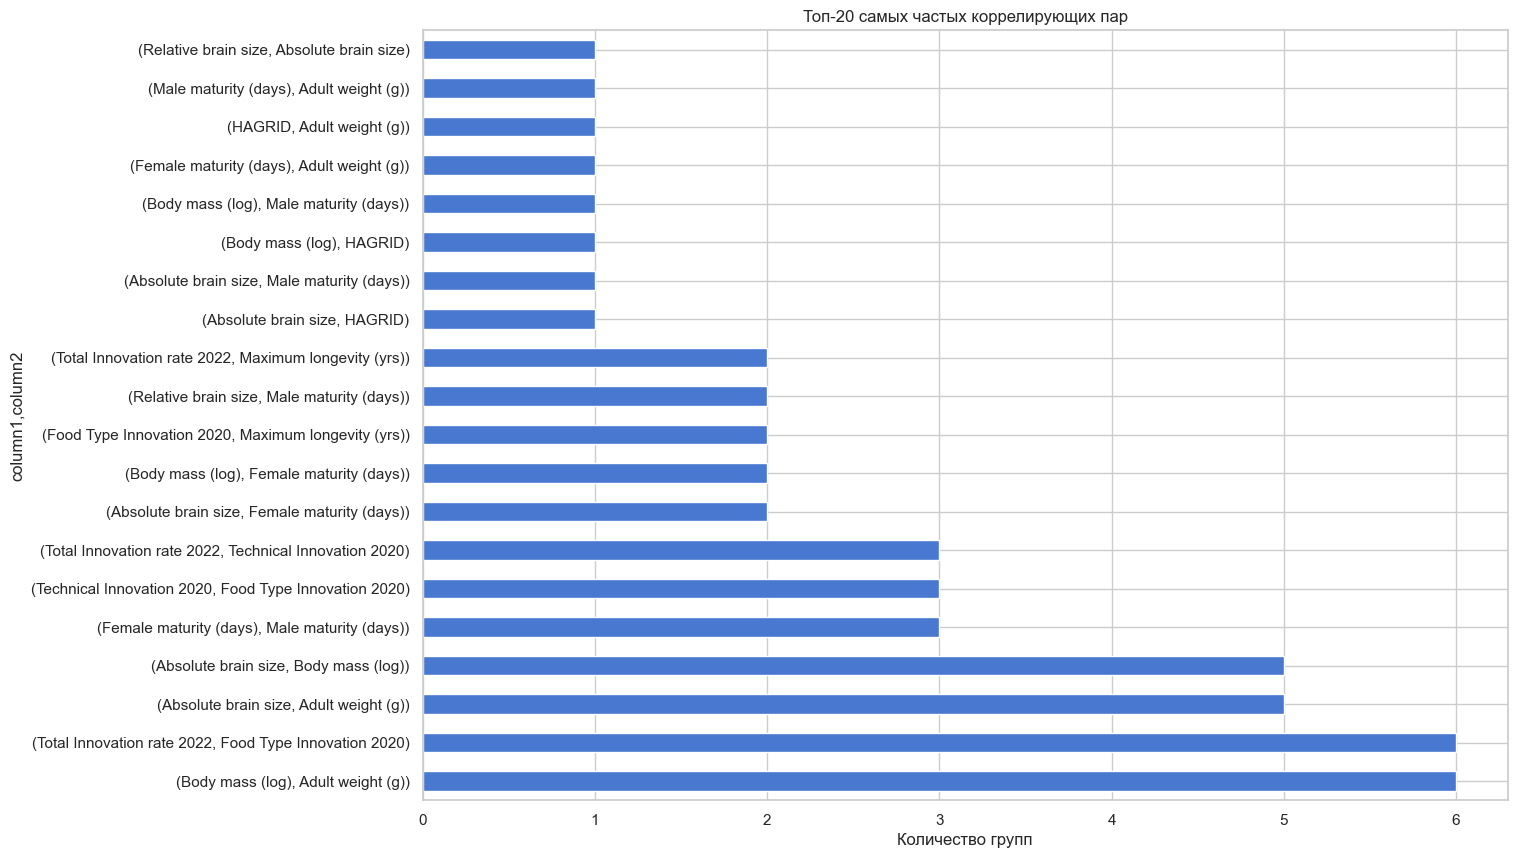

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm import tqdm  # для прогресс-бара

def analyze_correlations(df, group_col, analysis_cols, 
                         corr_threshold=0.5, p_threshold=0.05,
                         min_obs=3, output_file='correlation_results.xlsx'):
    """
    Анализ корреляций между колонками для каждой группы с расширенной статистикой
    
    Параметры:
    - df: исходный DataFrame
    - group_col: колонка для группировки
    - analysis_cols: список колонок для анализа корреляций
    - corr_threshold: минимальная абсолютная корреляция для включения в результаты
    - p_threshold: максимальное p-value для статистической значимости
    - min_obs: минимальное количество наблюдений для расчета корреляции
    - output_file: имя файла для сохранения результатов
    """
    
    # Подготовка данных - только числовые колонки
    numeric_cols = df[analysis_cols].select_dtypes(include=[np.number]).columns.tolist()
    print(f"Анализируем {len(numeric_cols)} числовых колонок: {numeric_cols}")
    
    # DataFrame для результатов
    results = pd.DataFrame(columns=[
        'group', 'column1', 'column2', 'correlation', 
        'p_value', 'n_observations', 'ci_lower', 'ci_upper'
    ])
    
    # Цикл по группам с прогресс-баром
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_cols].dropna(how='all')
        
        # Пропускаем группы с недостаточным количеством данных
        if len(group_data) < min_obs:
            continue
            
        # Анализ всех уникальных пар колонок
        for i, col1 in enumerate(numeric_cols):
            for j, col2 in enumerate(numeric_cols):
                if i < j:  # избегаем дублирования
                    pair_data = group_data[[col1, col2]].dropna()
                    n_obs = len(pair_data)
                    
                    if n_obs >= min_obs:
                        try:
                            corr, p_val = pearsonr(pair_data[col1], pair_data[col2])
                            
                            # Доверительный интервал для корреляции
                            z = np.arctanh(corr)
                            se = 1/np.sqrt(n_obs-3)
                            ci_z = np.array([z - 1.96*se, z + 1.96*se])
                            ci = np.tanh(ci_z)
                            
                            if abs(corr) >= corr_threshold and p_val <= p_threshold:
                                results.loc[len(results)] = [
                                    group, col1, col2, corr, 
                                    p_val, n_obs, ci[0], ci[1]
                                ]
                        except:
                            continue
    
    # Сортировка результатов
    results = results.sort_values(
        by=['group', 'correlation'], 
        key=lambda x: abs(x) if x.name == 'correlation' else x,
        ascending=[True, False]
    )
    
    # Сохранение в Excel с несколькими листами
    with pd.ExcelWriter(output_file) as writer:
        results.to_excel(writer, sheet_name='Все результаты', index=False)
        
        # Сводная таблица по частоте встречаемости корреляций
        correlation_counts = results.groupby(['column1', 'column2']).size().reset_index(name='count')
        correlation_counts = correlation_counts.sort_values('count', ascending=False)
        correlation_counts.to_excel(writer, sheet_name='Частые корреляции', index=False)
        
        # Топ-10 самых сильных корреляций
        top_correlations = results.nlargest(10, 'correlation')
        top_correlations.to_excel(writer, sheet_name='Топ положительных', index=False)
        top_correlations = results.nsmallest(10, 'correlation')
        top_correlations.to_excel(writer, sheet_name='Топ отрицательных', index=False)
    
    # Визуализация
    plot_correlation_results(results)
    
    return results

def plot_correlation_results(results):
    """Визуализация результатов анализа корреляций"""
    if results.empty:
        print("Нет значимых корреляций для визуализации")
        return
    
    # Настройки стиля
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(14, 10))
    
    # Топ-20 самых частых пар
    #plt.subplot(2, 2, 1)
    top_pairs = results.groupby(['column1', 'column2']).size().nlargest(20)
    top_pairs.plot(kind='barh')
    plt.title('Топ-20 самых частых коррелирующих пар')
    plt.xlabel('Количество групп')
    plt.show()

results = analyze_correlations(
    df=sps_age_merged,
    group_col="Order",               # колонка для группировки
    analysis_cols=clean_cols,  # колонки для анализа
    corr_threshold=0.5,         # порог корреляции
    p_threshold=0.05,           # порог значимости
    min_obs=5,                  # минимальное количество наблюдений
    output_file='correlation_results.xlsx'
)

In [79]:
results[results["column2"] == "Maximum longevity (yrs)"]

,group,column1,column2,correlation,p_value,n_observations,ci_lower,ci_upper
34,Columbiformes,Technical Innovation 2020,Maximum longevity (yrs),0.910693,0.031605,5,0.144620,0.994170
14,Falconiformes,Food Type Innovation 2020,Maximum longevity (yrs),0.902898,0.035789,5,0.101406,0.993637
12,Falconiformes,Total Innovation rate 2022,Maximum longevity (yrs),0.900608,0.037049,5,0.089260,0.993480
4,Passeriformes,Food Type Innovation 2020,Maximum longevity (yrs),0.606506,0.005903,19,0.210196,0.831623
2,Passeriformes,Total Innovation rate 2022,Maximum longevity (yrs),0.542159,0.016484,19,0.116675,0.799494


/var/folders/fc/n8rj9g1j6_x12_dl3p0fqv7c0000gn/T/ipykernel_16279/2517244109.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


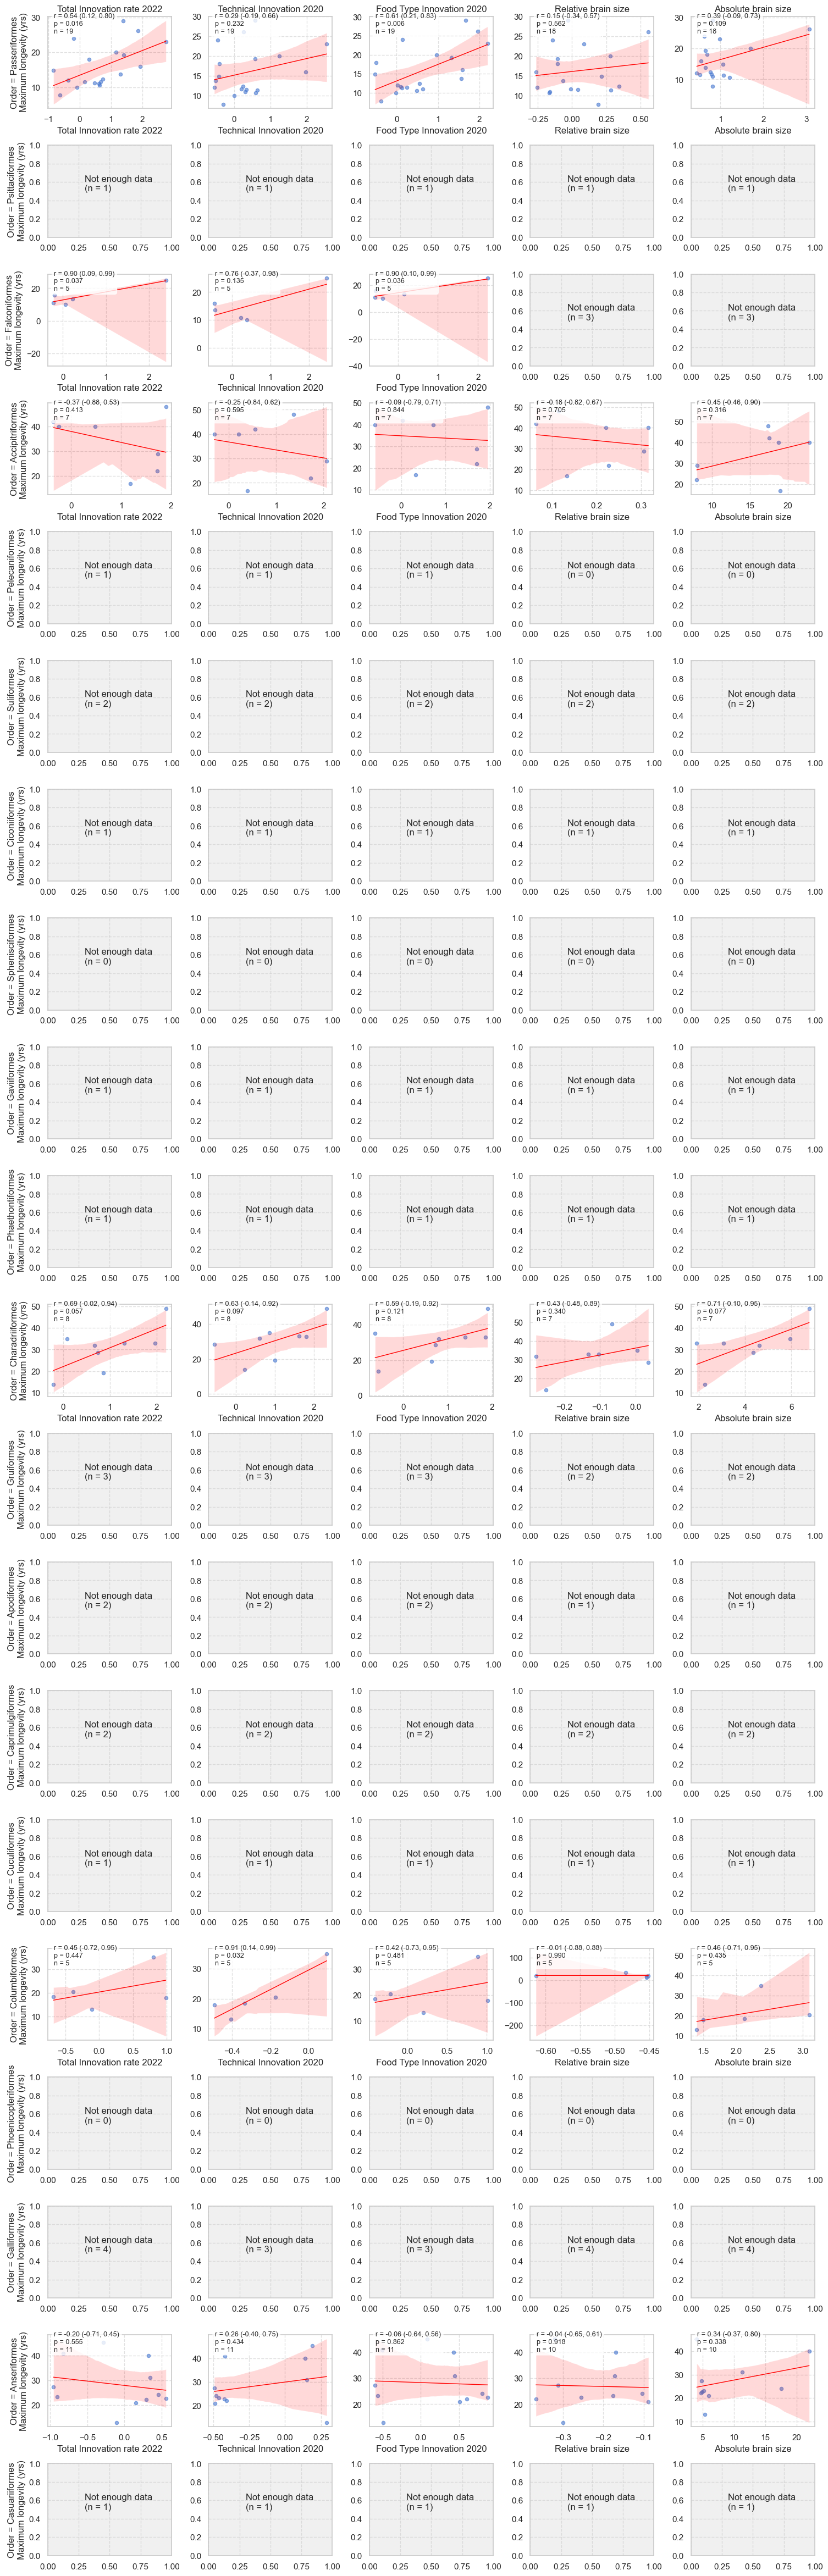

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import sqrt

def calculate_correlation_with_ci(x, y):
    """Вычисляет корреляцию Пирсона с доверительным интервалом"""
    n = len(x)
    r, p = pearsonr(x, y)
    
    # Расчет доверительного интервала 95% с использованием Z-преобразования Фишера
    if n > 3 and abs(r) < 1.0:
        z = np.arctanh(r)
        se = 1.0 / sqrt(n - 3)
        z_lower = z - 1.96 * se
        z_upper = z + 1.96 * se
        ci_lower = np.tanh(z_lower)
        ci_upper = np.tanh(z_upper)
    else:
        ci_lower, ci_upper = np.nan, np.nan
    
    return r, p, n, ci_lower, ci_upper

def plot_correlations_panel(df, y_col, z_col, x_cols, 
                           corr_threshold=0.0, p_threshold=0.05,
                           min_obs=5, fig_width=15, row_height=3):
    """
    Строит панель графиков корреляций между Z и X-колонками для каждой группы Y
    
    Параметры:
    - df: DataFrame с данными
    - y_col: колонка для группировки (Y)
    - z_col: целевая колонка (Z)
    - x_cols: список колонок для анализа корреляций с Z
    - corr_threshold: минимальная абсолютная корреляция для отображения
    - p_threshold: максимальное p-value для отображения
    - min_obs: минимальное количество наблюдений
    - fig_width: ширина всей панели
    - row_height: высота одной строки (группы Y)
    """
    
    # Уникальные значения Y
    y_values = df[y_col].unique()
    n_y = len(y_values)
    n_x = len(x_cols)
    
    # Создаем фигуру с правильным количеством строк и колонок
    fig, axes = plt.subplots(
        n_y, n_x, 
        figsize=(fig_width, row_height * n_y),
        squeeze=False,
        gridspec_kw={'hspace': 0.4, 'wspace': 0.3},
    )
    
    # Проходим по всем комбинациям Y и X
    for i, y_val in enumerate(y_values):
        subset = df[df[y_col] == y_val]
        
        for j, x_col in enumerate(x_cols):
            ax = axes[i, j]
            
            # Очищаем данные от пропусков
            clean_data = subset[[z_col, x_col]].dropna()
            n_obs = len(clean_data)
            
            if n_obs >= min_obs:
                r, p, n, ci_lower, ci_upper = calculate_correlation_with_ci(
                    clean_data[z_col], clean_data[x_col])

                sns.regplot(data=clean_data, x=x_col, y=z_col, ax=ax, ci=95,
                            scatter_kws={'s': 20, 'alpha': 0.6},
                            line_kws={'color': 'red', 'lw': 1})
                
                stats_text = (f"r = {r:.2f} ({ci_lower:.2f}, {ci_upper:.2f})\n"
                            f"p = {p:.3f}\n"
                            f"n = {n}")
                ax.annotate(stats_text, xy=(0.05, 0.82), xycoords='axes fraction',
                               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                               fontsize=9)  # Уменьшили размер шрифта
            else:
                ax.annotate(f"Not enough data\n(n = {n_obs})", 
                           xy=(0.3, 0.5), xycoords='axes fraction')
                ax.set_facecolor('#f0f0f0')
            
            # Настройка осей и заголовков
            if i == 0:
                ax.set_title(x_col)
            if j == 0:
                ax.set_ylabel(f"{y_col} = {y_val}\n{z_col}")
            else:
                ax.set_ylabel("")
            
            ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('correlation_panel.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_correlations_panel(
    df=sps_age_merged,
    y_col='Order',          # колонка для группировки
    z_col='Maximum longevity (yrs)',          # целевая колонка
    x_cols=[
        'Total Innovation rate 2022',
       'Technical Innovation 2020', 
       'Food Type Innovation 2020',
       'Relative brain size', 
       'Absolute brain size'
    ],  # список колонок для анализа
    corr_threshold=0.3, # минимальная корреляция для выделения
    p_threshold=0.05,   # максимальное p-value
    min_obs=5,          # минимальное количество наблюдений
    fig_width=18,       # ширина панели
    row_height=3        # высота строки для каждой группы Y
)

/var/folders/fc/n8rj9g1j6_x12_dl3p0fqv7c0000gn/T/ipykernel_16279/2517244109.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


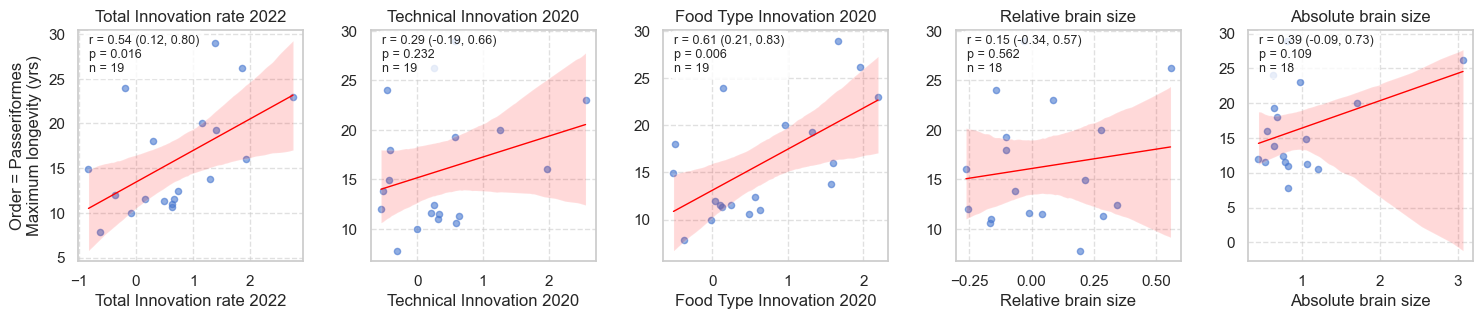

In [104]:
plot_correlations_panel(
    df=sps_age_merged[sps_age_merged["Order"] == "Passeriformes"],
    y_col='Order',          # колонка для группировки
    z_col='Maximum longevity (yrs)',          # целевая колонка
    x_cols=[
        'Total Innovation rate 2022',
       'Technical Innovation 2020', 
       'Food Type Innovation 2020',
       'Relative brain size', 
       'Absolute brain size'
    ],  # список колонок для анализа
    corr_threshold=0.3, # минимальная корреляция для выделения
    p_threshold=0.05,   # максимальное p-value
    min_obs=5,          # минимальное количество наблюдений
    fig_width=18,       # ширина панели
    row_height=3        # высота строки для каждой группы Y
)